# Workbook 5: Regularization and Variable Selection
## Dimension Reduction

Nowadays, a lot of attributes are recorded for an individual. In order to fit a simple model, some sort of dimension reduction seems necessary. Mathematically, dimension reduction involves projection of the data into a lower-dimensional space in a certain way. There are various reasons why dimension reduction would be of interest:

- visualization of high-dimensional data,
- removing collinearity,
- better prediction by reducing the prediction variance.

### Loading and Preprocessing Data
Commonly two libraries are used to load a csv files.
- numpy function `np.loadtext` and `np.genfromtext ` 
- pandas function `pd.read_csv` [Preferable]

Data for the `auto` dataset can be found in mycourses/Content/Data.

Instruction for using Colab: [Here](https://www.tutorialspoint.com/google_colab/google_colab_quick_guide.htm)

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# If using colab 
# from google.colab import files
# uploaded = files.upload()


In [ ]:
# import io
# auto = pd.read_csv(io.BytesIO(uploaded['Auto.csv']))

In [ ]:
auto = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTA7gulAYNG79z1BraXVZcQ7YIgJw7OJNJ2_TlNqEapLG4Hz4DxDsFUiOZhLLVSohjpG6qKOGaetSRW/pub?gid=1481941866&single=true&output=csv')

In [ ]:
try:
  auto = pd.read_csv('Auto.csv')
  
except:
  print('Load file')

Load file


In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

In [ ]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

In [ ]:
coerce_df_columns_to_numeric(auto, ['horsepower'])

In [ ]:
auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000,NaN


We have some missing values!

In [ ]:
auto_hp_na = auto[auto.isnull().any(axis=1)]

In [ ]:
auto_hp_na.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


In [ ]:
auto_hp_na['horsepower'].fillna((auto['horsepower'].mean()), inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
auto_hp_na.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,104.469388,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,104.469388,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,104.469388,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,104.469388,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,104.469388,2320,15.8,81,2,renault 18i


Other ways to fill


*   Pad (fill with values at next or previous rows).
*   Interpolate (a better but complex approach).



If you want to simply drop all rows which have missing values:

In [ ]:
auto = auto.dropna()

In [ ]:
auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
# only quantitative variables
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = auto['mpg']

In [ ]:
X

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5
2,8,318.0,150.0,3436,11.0
3,8,304.0,150.0,3433,12.0
4,8,302.0,140.0,3449,10.5
...,...,...,...,...,...
392,4,140.0,86.0,2790,15.6
393,4,97.0,52.0,2130,24.6
394,4,135.0,84.0,2295,11.6
395,4,120.0,79.0,2625,18.6


In [ ]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 392, dtype: float64

### Principal Components

Principal dimensionality reduction uses Singular Value Decomposition of the data to project it to a lower dimensional space.

Questions:

1. Is PCA required on my dataset?
2. Should I normalize?
3. How many principal components to choose?


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
from sklearn.preprocessing import scale
# The following independently standardizes each feature (it's the default value 0 for "axis" argument)
X_std = scale(X.values)

You can also use *StandardScaler* class. [Link](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

In [ ]:
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
explained_variance = pd.DataFrame(pca.explained_variance_)


Text(0.5, 1.0, 'Explained Variance')

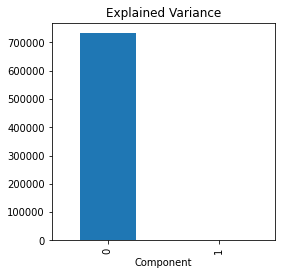

In [ ]:
ax = explained_variance.head().plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')
ax.set_title('Explained Variance')

Text(0.5, 1.0, 'Explained Variance Ratio')

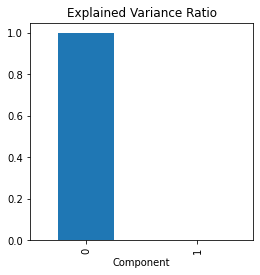

In [ ]:
explained_variance_ratio = pd.DataFrame(pca.explained_variance_ratio_)

ax = explained_variance_ratio.head().plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')
ax.set_title('Explained Variance Ratio')

In [ ]:
loadings = pd.DataFrame(pca.components_, columns=X.columns)
#pca.components_
loadings

,cylinders,displacement,horsepower,weight,acceleration
0,0.001793,0.114341,0.038967,0.992674,-0.001353
1,0.013330,0.946116,0.298150,-0.120754,-0.034828


In [ ]:
Z = pca.transform(X)

In [ ]:
# Fitting the model on X_std
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 0, 'Component')

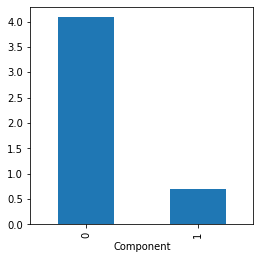

In [ ]:
explained_variance = pd.DataFrame(pca.explained_variance_)
ax = explained_variance.head().plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

Text(0.5, 0, 'Component')

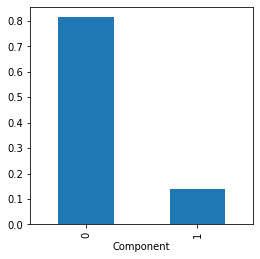

In [ ]:
explained_variance_ratio = pd.DataFrame(pca.explained_variance_ratio_)

ax = explained_variance_ratio.head().plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')


In [ ]:
explained_variance_ratio

,0
0,0.814372
1,0.138772


In [ ]:
loadings = pd.DataFrame(pca.components_, columns=X.columns)
#pca.components_
loadings

,cylinders,displacement,horsepower,weight,acceleration
0,0.468717,0.482404,0.473844,0.461790,-0.331379
1,0.223479,0.178630,-0.119989,0.345286,0.885736


In [ ]:
Z_std = pca.transform(X_std)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

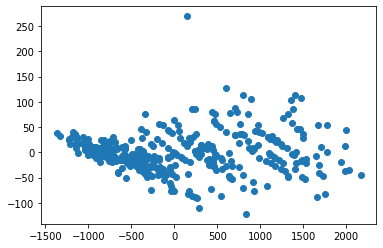

In [ ]:
plt.scatter(Z[:,0], Z[:,1])

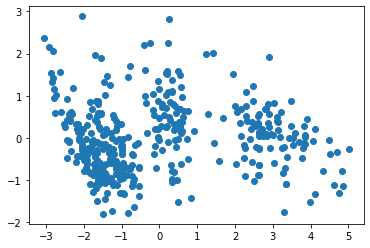

In [ ]:
# Now Z includes a summary of X only in two dimensions. 
plt.scatter(Z_std[:,0], Z_std[:,1]);

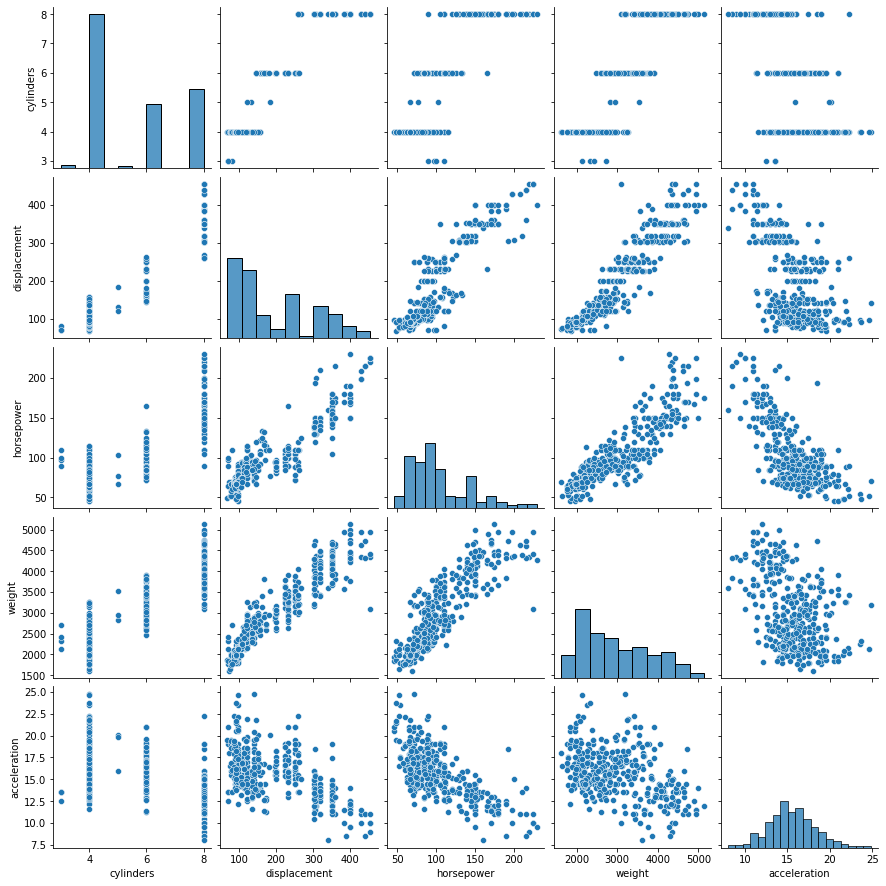

In [ ]:
pairplot = sns.pairplot(X)
plt.show()

In [ ]:
X.corr()

,cylinders,displacement,horsepower,weight,acceleration
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


<span style="color:red"> **Note:** </span>
Principal components for non-standardized and standardized data are different.

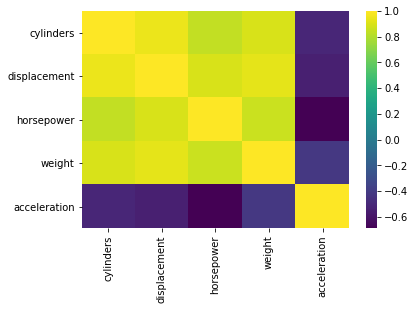

In [ ]:
sns.heatmap(X.corr(), cmap='viridis')

[sk-learn scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)

### Principal Component Regression
Now, We may use the above principal components as attributes to feed a linear regression and lets observe the insample results:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()

In [ ]:
X_simple = X[['horsepower']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train_simple = X_train[['horsepower']]
X_test_simple = X_test[['horsepower']]
X_train_std = scale(X_train.values)
X_test_std = scale(X_test.values)
X_train_std_pca = pca.transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)
print(f'X_train size; {X_train.shape}, X_test size; {X_test.shape}, y_train size; {y_train.shape} y_test size; {y_test.shape}')



X_train size; (294, 5), X_test size; (98, 5), y_train size; (294,) y_test size; (98,)


In [ ]:
lr.fit(X_train_simple,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# R^2 
lr.score(X_train_simple, y_train)

0.6131224539832818

In [ ]:
lr_all_features = LinearRegression()

In [ ]:
lr_all_features.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_all_features.score(X_train,y_train)

0.7157949802231671

In [ ]:
pcr = LinearRegression()

In [ ]:
pcr.fit(X_train_std_pca,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pcr.score(X_train_std_pca,y_train)

0.7035119283219466

$R^2$ is an in sample method. Lets see the results on the test set:

In [ ]:
y_pred_simple = lr.predict(X_test_simple)
y_pred_all_features = lr_all_features.predict(X_test)
y_pred_pca = pcr.predict(X_test_std_pca)

mae_simple = mean_absolute_error(y_test, y_pred_simple)
mae_all_features = mean_absolute_error(y_test, y_pred_all_features)
mae_pca = mean_absolute_error(y_test, y_pred_pca)

print(f'mae_simple: {mae_simple}, mae_all_features: {mae_all_features}, mae_pca: {mae_pca}')

mae_simple: 3.781267671503429, mae_all_features: 3.379323241998647, mae_pca: 3.3928127148957308


### Regularization

In this case, using all features leads to better results in-sample and out-of-sample. Let's see if we can do better with lasso regularization:

Ridge or L2 regression

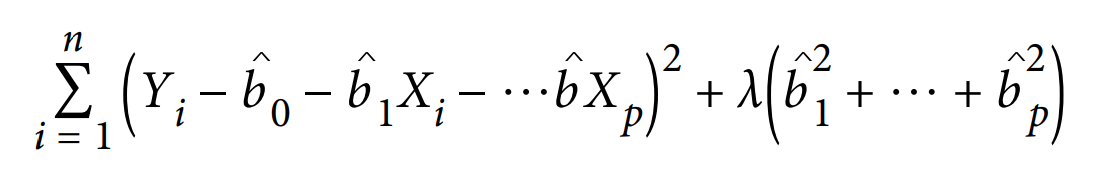

Lasso or L1 regularization

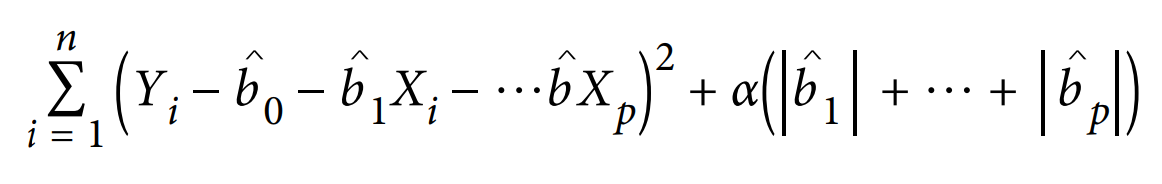

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso_regression = Lasso(alpha=0.5)
lasso_regression.fit(X_train,y_train)
print('R^2:',lasso_regression.score(X_train,y_train))
y_pred_lasso = lasso_regression.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'mae_lasso: {mae_lasso}')

R^2: 0.7150898623825372
mae_lasso: 3.3978447776736056


In [ ]:
import sys
print(sys.version)

3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


In [ ]:
ridge_regression = Ridge()
ridge_regression.fit(X_train,y_train)
print(ridge_regression.score(X_train,y_train))
y_pred_ridge = ridge_regression.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'mae_ridge: {mae_ridge}')

0.7157949312849465
mae_ridge: 3.379578040881737


### Features Selection

There are many ways to select features. Here we will select them by using the feature importance of a random forest model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestRegressor(n_estimators = 10, random_state=42))
print('Before feature selection X shape: ',X_train.shape[1])
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print('The number of selected features:', len(selected_feat))
print('The selected features are:', selected_feat)
print('After feature selection X shape: ',selected_feat.shape)

Before feature selection X shape:  5
The number of selected features: 2
The selected features are: Index(['cylinders', 'displacement'], dtype='object')
After feature selection X shape:  (2,)


Now lets look at the results with the subset of data:

In [ ]:
feat_selection_model = LinearRegression()
feat_selection_model.fit(X_train[selected_feat],y_train)
feat_selection_model.score(X_train[selected_feat],y_train)
print('R^2:',feat_selection_model.score(X_train[selected_feat],y_train))
y_pred_feat_selection = feat_selection_model.predict(X_test[selected_feat])
mae_feat_selection = mean_absolute_error(y_test, y_pred_feat_selection)
print(f'mae: {mae_feat_selection}')

R^2: 0.6642001199142471
mae: 3.6700972777667644


For this dataset, it still looks like all features leads to better predictions

### Zip code data (Data Manipulation)
When we are dealing with high-dimensional data, PCA may be used to visualize the data. That is, you can use up to $3$ priciple components as your axese and visualize your data with respect to these axes.

In this part, we are using the famous dataset MNIST available from <http://yann.lecun.com/exdb/mnist/>. For more information about the data refer to the link please.

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

In [ ]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

#### Data structure
The first column is the digit, the remaining 256 are pixels of a 16X16 grayscale image. Let's visualize the first row.

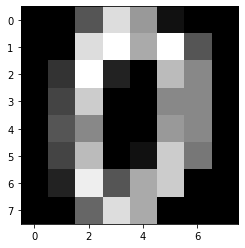

In [ ]:
plt.imshow(digits.images[0].reshape(8,8), cmap = "gray")

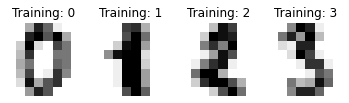

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
# images_and_labels = np.array(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [ ]:
# Check the first observation
len(images_and_labels)

1797

In [ ]:
# List the images
images_ = [image_label[0].flatten() for image_label in images_and_labels]

In [ ]:
# Stack images in a numpy array
zipdata = np.stack(images_, axis=0 )

In [ ]:
zipdata.shape

(1797, 64)

In [ ]:
# Add labels at beginning
zipdata = np.c_[digits.target, zipdata]

## Numpy
It is important that you feel comfortable with numpy arrays and can perform the following :

+ concatenating, 
+ deleting, 
+ reshaping, and 
+ etc. 

Here I provide you some examples.

#### Select a Sub-Array
Here, we select images related to digit 3, and then visualize a random sample of such images:

In [ ]:
zipdata3=zipdata[zipdata[:, 0] == 3]
zipdata3.shape
# only 183 samples are 3

(183, 65)

In [ ]:
import numpy as np
np.random.seed(1)
random3=np.random.choice(range(zipdata3.shape[0]), size=20, replace = False)  

In [ ]:
random3

array([ 53,  91, 118, 178,  47, 166,  31, 177, 152, 120,  16, 110, 127,
        11,  78,   4,  94,  14,  29,  19])

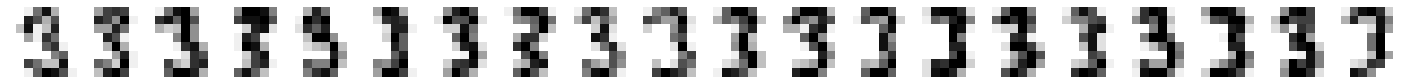

In [ ]:
zipdata3stack = zipdata3[random3[0], 1:].reshape(8, 8)

for i in range(1,len(random3)):
    zipdata3stack = np.hstack((zipdata3stack, zipdata3[random3[i],1:].reshape(8, 8)))

fig, ax = plt.subplots(figsize=(25, 3))
ax.imshow(-zipdata3stack,"gray");
ax.axis("off");

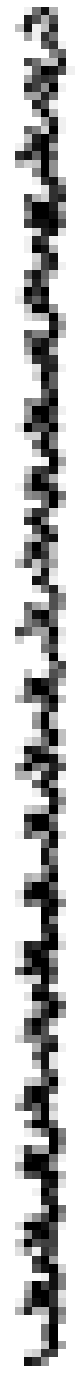

In [ ]:
# You may want to plot vertically
# This is a more clever coding, we do not need  "for" loop
magic_number = 1280//8 # Exercice: Think about how this number has been chose.
fig, ax = plt.subplots(figsize=(3, 25))
ax.imshow(-zipdata3[random3,1:].reshape(magic_number,8),"gray");
ax.axis("off");

# Exercice: Try to put spaces between the numbers displayed vertically.

In [ ]:
# Only 658 samples are 3
zipdata8=zipdata[zipdata[:, 0] == 8]
zipdata8.shape

(174, 65)

In [ ]:
zipdata8.shape

(174, 65)

In [ ]:
zipdata38 = np.vstack([zipdata3, zipdata8])
zipdata38.shape

(357, 65)

In [ ]:
pca = PCA(n_components=2)

# remove the first column (image label)
pca.fit(zipdata38[:, 1:])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
Z = pca.transform(zipdata38[:,1:])

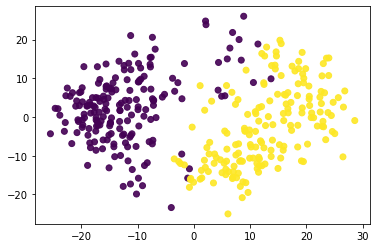

In [ ]:

plt.scatter(Z[:,0], Z[:,1], c= zipdata38[:,0], alpha=0.9);


(-20.0, 20.0)

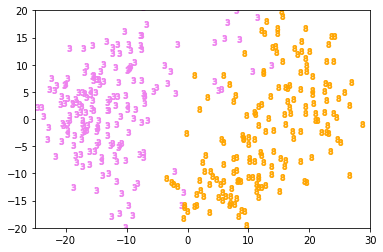

In [ ]:
# Let's make it more visual
plt.scatter(Z[zipdata38[:,0]==3,0], Z[zipdata38[:,0]==3,1], marker='$3$', 
            color='violet', alpha = 0.9);

plt.scatter(Z[zipdata38[:,0]==8,0], Z[zipdata38[:,0]==8,1], marker='$8$', 
            color='orange', alpha = 0.9);

plt.xlim([-25,30])
plt.ylim([-20,20])

# Breakout room exercise

1. Load iris dataset from pandas. [Already performed]
2. print first 5 rows and check for data consistency. *Hint: describe, dtypes, info*
3. Identify the number of classes.
4. Check if data is balanced or not. *Hint: value_counts()*
5. Check for correlated features. *Hint sns.pairplot(), df.corr()*
    * You can standardize your data. Use [sklearn-StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
6. Dimensionality reduction: Choose the number of *Principal Components* to retain. *Can use: pca.explained_variance_ratio_*
7. Train logistic regression and evaluate the performance (CM, Report, Precision, recall)
8. Now train a model on the raw dataset and compare the results from Step 7.
9. Can you time the runs. 
  * You can use package: [datetime](https://docs.python.org/3/library/datetime.html) 
  * Example:     

    ```
      start_time = datetime.datetime.now()
      # Train your model here
      end_time = datetime.datetime.now()
      time_taken = (end - start)
    ```





In [ ]:
# Q1 load iris data set from pandas
import pandas as pd
import seaborn as sns

df = sns.load_dataset('iris')



In [ ]:
# Q2 print the first 5 rows
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Q2 check for data consistency
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
# Q4 check if the data is balanced or not
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

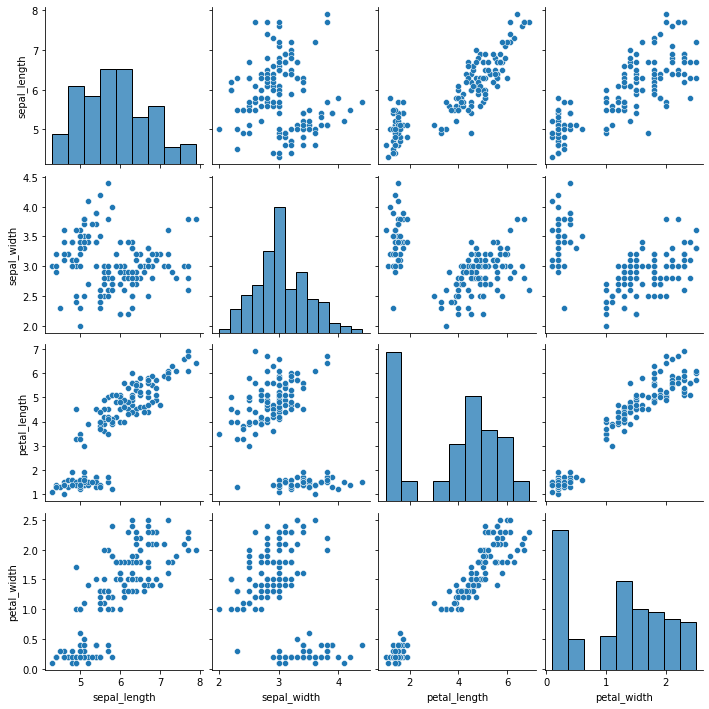

In [ ]:
# Q5
sns.pairplot(df)

It can be seen that 'petal_width' and 'petal length' co-vary. Same can be said about 'sepal_length' & 'petal_width'. So PCA is justified.

The same analysis can be drawn from correlation matrix.




In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


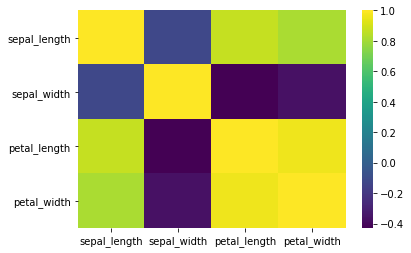

In [ ]:
sns.heatmap(df.corr(), cmap='viridis')

In [ ]:
predictor_columns = df.columns
predictor_columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
columns=df.columns[df.columns != 'species']
columns

predictors = pd.DataFrame(df, columns=df.columns[df.columns != 'species'])
predictors_std = scale(predictors)

predictors_std[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [ ]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import datetime

predictor_columns = df.columns
predictors = pd.DataFrame(df, columns=df.columns[df.columns != 'species'])
predictors_std = scale(predictors)

for n in range(1, 5):
   pca = PCA(n_components=n)
   pca.fit(predictors_std)

   explained_variance = pd.DataFrame(pca.explained_variance_ratio_)

   print("n=", n)
   print(explained_variance.sum())




n= 1
0    0.729624
dtype: float64
n= 2
0    0.958132
dtype: float64
n= 3
0    0.994821
dtype: float64
n= 4
0    1.0
dtype: float64


Choosing principal components = 2

Stratify for maintaining class balance for 'test' & 'train'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    predictors, df['species'], test_size=0.15, random_state=0, stratify=df['species'].values.reshape(-1,1)
)


Using `StandardScaler` since we will transform X_test based on the instance learnt from X_train

In [ ]:
scaler = StandardScaler().fit(X_train)

X_train_std = scaler.transform(X_train)
pca = PCA(n_components=2)
Z_train_std_pca = pca.fit_transform(X_train_std)

explained_variance = pd.DataFrame(pca.explained_variance_ratio_)


In [ ]:
start_time = datetime.datetime.now()

logreg = LogisticRegression(multi_class = 'auto', max_iter=1000)
logreg.fit(Z_train_std_pca, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_test_std = scaler.transform(X_test)

y_predict = logreg.predict(pca.transform(X_test_std))

print(confusion_matrix(y_test, y_predict))
print('\n Accuracy: ', accuracy_score(y_test, y_predict))
print('\n Classification Report: \n ', classification_report(y_test, y_predict)) 

end_time = datetime.datetime.now()
time_taken = (end_time - start_time)

print("Time taken:", time_taken.microseconds)

[[8 0 0]
 [0 8 0]
 [0 1 6]]

 Accuracy:  0.9565217391304348

 Classification Report: 
                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.86      0.92         7

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.95        23
weighted avg       0.96      0.96      0.96        23

Time taken: 31018


In [ ]:

start_time = datetime.datetime.now()

logregraw = LogisticRegression( multi_class = 'auto', max_iter=1000)
logregraw.fit(X_train, y_train)

y_predict_raw = logregraw.predict(X_test)

print(confusion_matrix(y_test, y_predict_raw))
print('\n Accuracy: ', accuracy_score(y_test, y_predict_raw))
print('\n Classification Report: \n ', classification_report(y_test, y_predict_raw)) 

end_time = datetime.datetime.now()
time_taken = (end_time - start_time)

print("Time taken:", time_taken.microseconds)

[[8 0 0]
 [0 8 0]
 [0 0 7]]

 Accuracy:  1.0

 Classification Report: 
                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Time taken: 57979
